## Case-Study: Maintenance Communities within the RNV network


The RNV (Rhein-Neckar-Verkehr GmbH) wants to improve its ability to respond to break-downs in their transportation network by reorganizing their service and maintenance organization. The current plan is to replace the single maintenance team for the entire network with three maintenance teams, each responsible for a small set of stops in the RNV network.

Your objective is to propose three sets of stops to the RNV that will enable them to create the three maintenance teams they plan to implement. Each set of stops should be assigned to a different maintenance team to ensure that the RNV network can be properly maintained and serviced.

![rnv_graph.png](https://drive.google.com/uc?id=1lQnbnIscBtmVw5R-vrX2ijaxa9xWUxCh)

The RNV network contains tram stops and their connections in the network. Each stop is represented by a node, and the connections between them are represented by edges.
The network was created based on the data from the [RNV open data portal](https://www.opendata-oepnv.de//ht/de/organisation/verkehrsunternehmen/rnv/openrnv/datensaetze?tx_vrrkit_view%5Bdataset_name%5D=soll-fahrplandaten-rnv&tx_vrrkit_view%5Baction%5D=details&tx_vrrkit_view%5Bcontroller%5D=View).


Build a network graph using the tram stop dataset, where each stop is a node, and each connection between stops is an edge.
Visualize the graph.

In [2]:
import networkx as nx
# Load the graph and exclude the weights.
G_rnv = nx.read_edgelist("/content/rnv_connected_stations.txt", create_using=nx.Graph(), delimiter='\t', data=False)
print('Number of stops (nodes): ', len(G_rnv.nodes))
print('Number of connections (edges): ', len(G_rnv.edges))

Number of stops (nodes):  460
Number of connections (edges):  555


In [3]:
import matplotlib.pyplot as plt

nx.draw_networkx(G_rnv, font_size=30)
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## K-Cores

Run the k-cores algorithm to detect communities in the network.
Each stop should be at least connected to 3 other stops.

Visulize the resulting graph and interpret the result.
- Are k-cores a suitable approach for splitting the RNV network into groups of stations that are to be maintained by the different maintenance teams? 
- If not, which methods could deliver better results?

Component:
	 Bismarckplatz
	 Gaisbergstraße
	 Friedrich-Ebert-Platz
	 Seegarten

Component:
	 Westlich B 9
	 Speyerer Straße
	 Am Hüttengraben
	 Hedwig-Laudien-Ring



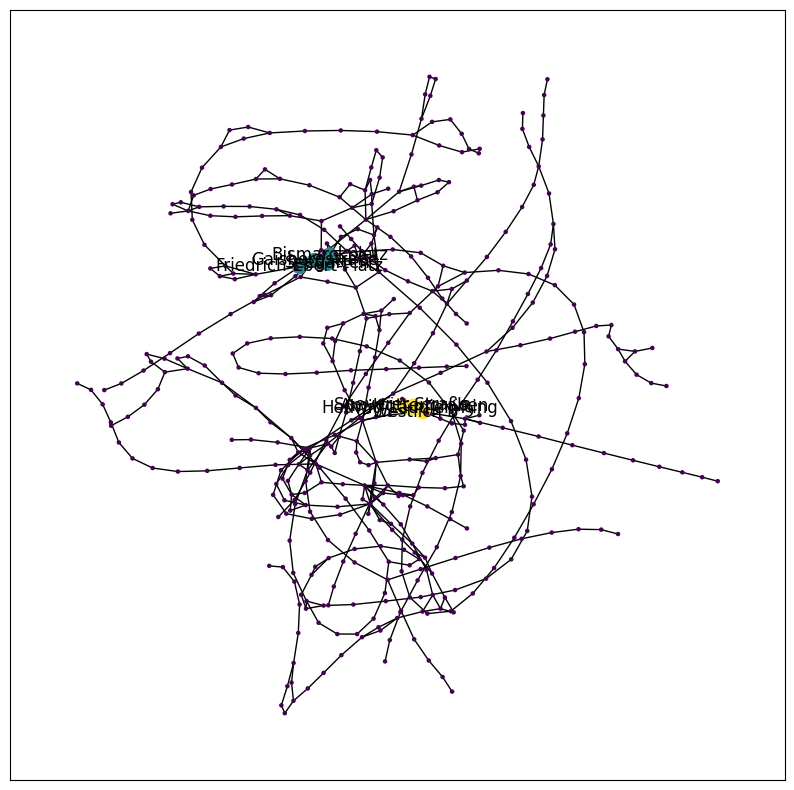

In [4]:
# Use Networkx k_core method with k=3
G_rnv_3_core = nx.k_core(G_rnv, 3)

# Initialize label, color and size dict for visualizing the graphs
node_label_dict = {v: '' for v in G_rnv.nodes()}
node_color_dict = {v:5 for v in G_rnv.nodes()}
node_size_dict = {v:5 for v in G_rnv.nodes()}

pos = nx.spring_layout(G_rnv, scale=5, seed=42)
current_color = 0
for component in nx.connected_components(G_rnv_3_core):
    # Change color of nodes with this component
    current_color += 100
    print('Component:')
    for node in component:
        # Add node color and size
        node_color_dict[node] = current_color
        
        print('\t {}'.format(node))
        # Add node label and size for the visualization
        node_label_dict[node] = node
        node_size_dict[node] = 100
    print('')
# Set node size and color of the output network
node_size = [node_size_dict[v] for v in G_rnv.nodes()]
node_color = [node_color_dict[v] for v in G_rnv.nodes()]

# Draw the network
plt.figure(figsize=(10,10))
nx.draw_networkx(G_rnv, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=node_label_dict )
plt.show()

K-cores are a type of subgraph in a network where all nodes have at least k connections to other nodes within the subgraph. In the context of the RNV's transportation network, k-cores can be used to identify sets of stops that are highly interconnected. 

Unfortunately, the most stops of the RNV graph are not highly connected, because usually one stop is connected to at most two other stations. k-cores is not helpful in this context. Additionally, we neglect many stops in the network, because they are not added to any component.

## Divisive Hierarchical Clustering

Use divisive clustering to detect communities in the network.
The measure to find strong edges is edge betweenness.

Keep in mind that your goal is to identity 3 maintenance organizations (communitites).

In [11]:
G_rnv_clustered = G_rnv.copy()
nx.number_connected_components(G_rnv_clustered)

1

In [5]:
# Divisive Clustering based on Edge Betweenness
G_rnv_clustered = G_rnv.copy()

while(True):
    # Identify "weakest" edge
    top_betweeness_edge_score = sorted(nx.edge_betweenness_centrality(G_rnv_clustered).items(), key=lambda item: item[1], reverse=True)[0]
    top_betweeness_edge = top_betweeness_edge_score[0]
    
    # Remove edge
    G_rnv_clustered.remove_edge(top_betweeness_edge[0], top_betweeness_edge[1])
    
    # Stop removing edges as soon as the graph is split into three components.
    if nx.number_connected_components(G_rnv_clustered) == 3:
        break

print('Number of components: {}'.format(nx.number_connected_components(G_rnv_clustered)))

Number of components: 3


Please visualize the maintenance groups in the graph. 

Each maintenance group needs a depot within their sub-component of the graph.
Determine for each maintenance group the five stops with the highest importance for the reliability of the network in the respective sub-component. A depot can be placed at one of these stops.

Which measure is suitable to determine the importance of a station for the reliability of the network?

In [17]:
print(node_label_dict)
print(node_color_dict)
print(node_size_dict)
print(pos)


{'Kopernikusstraße': '', 'Krappmühlstraße': '', 'Tattersall': '', 'MA Hauptbahnhof': 'MA Hauptbahnhof', 'Universität': '', 'MA Schloss': '', 'Paradeplatz': '', 'MA Marktplatz': '', 'Abendakademie': '', 'Alte Feuerwache': '', 'Carl-Benz-Straße': '', 'Neuer Meßplatz': '', 'Herzogenriedstraße': '', 'Untermühlaustraße': '', 'Luzenberg': '', 'Waldhof Bahnhof': '', 'Waldhof Nord': '', 'Schönau Siedlung': '', 'Schönauschule': '', 'Schönau': '', 'Bth. MA Möhlstraße': '', 'MA Hochschule': '', 'Lettestraße': '', 'Voltastraße': '', 'Neckarau Bahnhof': '', 'Friedrichstraße': '', 'Isarweg': '', 'Dannstadter Straße': '', 'Sandrain': '', 'Rheinau Karlsplatz': '', 'Neuhofer Straße': '', 'Waldseestraße': '', 'Distelsand': '', 'Rheinau Bahnhof': '', 'Kurpfalzbrücke': '', 'MVV-Hochhaus': '', 'Dalbergstraße': '', 'MA Rheinstraße': '', 'MA Rathaus/REM': '', 'Pestalozzischule': '', 'Weberstraße': '', 'Werderstraße': '', 'Kunsthalle': 'Kunsthalle', 'Rosengarten': 'Rosengarten', 'Gewerkschaftshaus': '', 'Wass

<generator object connected_components at 0x7fc7f844ac00>

Stops with the highest betweeness scores of the component: 
	 MA Hauptbahnhof
	 Kunsthalle
	 HD Hauptbahnhof
	 Rosengarten
	 Neuostheim


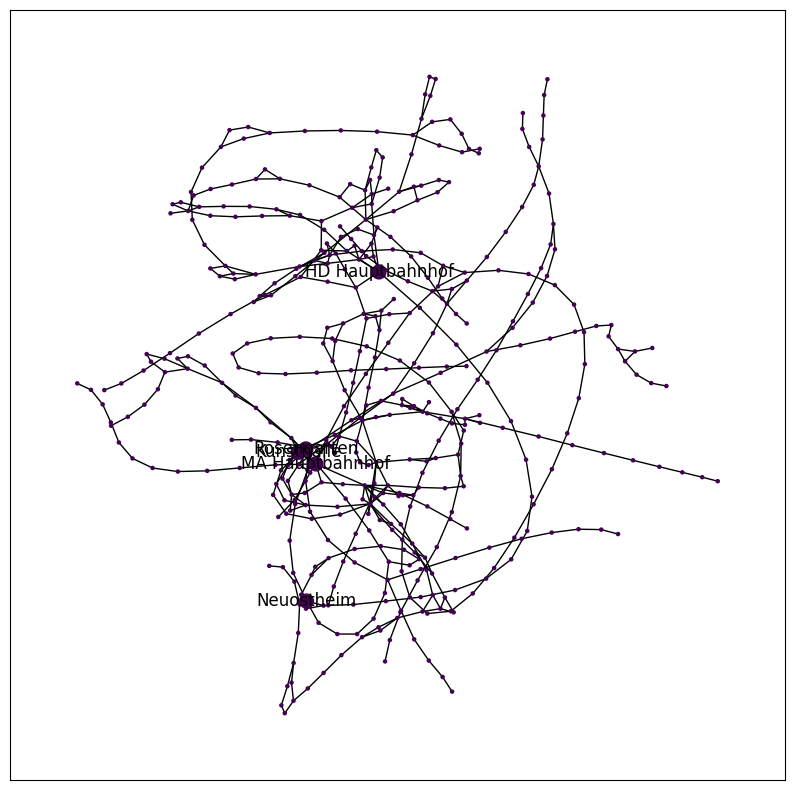

In [13]:
# Initialize label, color and size dict for visualizing the graphs
node_label_dict = {v: '' for v in G_rnv.nodes()}
node_color_dict = {v:5 for v in G_rnv.nodes()}
node_size_dict = {v:5 for v in G_rnv.nodes()}

pos = nx.spring_layout(G_rnv, scale=5, seed=42)
current_color = 0
for component in nx.connected_components(G_rnv_clustered):
    # Change color of nodes with this component
    current_color += 100
    print('Stops with the highest betweeness scores of the component: ')
    # Determine subgraph of component and determine stops with the highest betweeness scores
    component_graph = G_rnv_clustered.copy()
    component_graph.remove_nodes_from([n for n in component_graph if n not in set(component)])
    top_betweeness_score_stops = [k for k,v in 
                                  sorted(nx.betweenness_centrality(component_graph, normalized =True).items(), 
                                         key=lambda item: item[1], reverse=True)[:5]]

    for node in component:
        # Add node color and size
        node_color_dict[node] = current_color

        if node in top_betweeness_score_stops:
            print('\t {}'.format(node))
            # Add node label and size for the visualization
            node_label_dict[node] = node
            node_size_dict[node] = 100

# Set node size and color of the output network
node_size = [node_size_dict[v] for v in G_rnv.nodes()]
node_color = [node_color_dict[v] for v in G_rnv.nodes()]

# Draw the network
plt.figure(figsize=(10,10))
nx.draw_networkx(G_rnv, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=node_label_dict )
plt.show()

We were looking for the betweenness score of the stops within the subcomponent.

The result of the divisive clustering technique is great, because it has successfully divided the network into three distinct components. What makes this finding even more fascinating is that each component represents one of the three cities Mannheim, Ludwigshafen, and Heidelberg. The division of the network into these communities is intuitively reasonable and could be highly valuable in helping the RNV reorganize their service and maintenance organization.

## Assignment : Game of Thrones: Network Analysis and community detection 

Your objective is to analyze the Game of Thrones network using the Networkx library, you will find below Datasets of the different books: 

https://github.com/mathbeveridge/asoiaf/tree/master/data 

here some basic tutorials that you can start with: 

https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis

https://dzone.com/articles/analyzing-relationships-in-game-of-thrones-with-ne-1

You have the choice to use whatever algorithms you want. However, you must answer a set of questions:

1. What is the most important caracter ?
2. Try multiple centrality measures, how can you interprete the output giving your domain knowledge (I presume that you already watched this serie :))
2. The evolution of Tyrion over the seasons (books)
3. Try multiple community detection algorithms, which one reflect the real communities (houses) in the serie and why ? 
4. ... 4 questions of your choice with a suitable answer 

![image.png](attachment:image.png)

In [96]:
import networkx as nx 
import pandas as pd
url = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv"
data = pd.read_csv(url)


graph = nx.Graph()
for _, row in data.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    graph.add_edge(node1, node2)

### 1. What is the most important caracter ?

To measure the most important carater i used degree centrality which measures the number of connections (edges) that a node has in the graph. 

So, The node with a high degree centrality is considered important as the most important caracter.





In [97]:
degree_centrality = nx.degree_centrality(graph)
most_important_caracter = max(degree_centrality, key=degree_centrality.get)
print(most_important_caracter)

Tyrion-Lannister


### 2. Try multiple centrality measures, how can you interprete the output giving your domain knowledge (I presume that you already watched this serie :)





In [98]:
#degree centrality
"""
Degree Centrality:
The code calculates the degree centrality for each character in the graph.
 Degree centrality measures the number of connections (edges) that a character has in the network.
  The character with the highest degree centrality is considered the most important based on the number of connections they have.
"""
degree_centrality = nx.degree_centrality(graph)
most_important_caracter1 = max(degree_centrality, key=degree_centrality.get)
print("Using degree centrality : ", most_important_caracter1)

#betweenness centrality
"""
The code calculates the betweenness centrality for each character in the graph. 
Betweenness centrality measures how often a character lies on the shortest path between any two other characters in the network. 
It identifies characters who act as "gatekeepers" or connectors between different groups or individuals.
"""
betweenness_centrality = nx.betweenness_centrality(graph)
most_important_caracter2 = max(betweenness_centrality, key=betweenness_centrality.get)
print("Using betweenness centrality : ", most_important_caracter2)

#closness centrality

"""
The code calculates the closeness centrality for each character in the graph.
 Closeness centrality measures how easily a character can communicate with other characters in the network.
 A character with high closeness centrality requires fewer steps to reach any other character in the network, 
 indicating their central position in terms of communication.
"""
closeness_centrality = nx.closeness_centrality(graph)
most_important_caracter3 = max(closeness_centrality, key=closeness_centrality.get)
print("Using closeness centrality : ", most_important_caracter3)

# pagerank 
"""
The code calculates the PageRank score for each character in the graph. 
PageRank is an algorithm that assigns importance scores to nodes based on the structure of the graph.
 In the context of the code, PageRank measures the influence or importance of a character based on the connections
 they have and the importance of the characters they are connected to.
"""
pagerank = nx.pagerank(graph)
most_important_caracter4 = max(pagerank, key=pagerank.get)
print("Using pagerank : ", most_important_caracter4)


Using degree centrality :  Tyrion-Lannister
Using betweenness centrality :  Jon-Snow
Using closeness centrality :  Tyrion-Lannister
Using pagerank :  Jon-Snow


**Degree centrality** is a metric that quantifies the number of connections a node has within a network. In the context of character interactions in a story, a character with high degree centrality is one who engages with numerous other characters. Tyrion Lannister epitomizes this concept as he traverses the Seven Kingdoms, forging connections with various houses and encountering a vast array of characters. His extensive travels and interactions contribute to his high degree centrality, making him a fitting example for this metric.

**Betweenness centrality** is a metric that quantifies the frequency with which a node lies on the shortest path between any two other nodes in a network. In the context of social networks, it can be likened to a "gatekeeper" who bridges disparate groups or individuals that may not have direct connections. In the Game of Thrones (GOT) universe, Jon Snow exemplifies this concept. He has associations with characters from various regions and factions, and his diplomatic abilities are renowned for negotiating alliances among houses and maintaining harmony. Consequently, it is fitting that Jon Snow emerges as the most central node in terms of betweenness centrality. His pivotal role lies in connecting different characters and groups within the network, which is evident in his contribution to reuniting the North and fostering the reunion of the Night's Watch and the Wildlings.

**Closeness centrality** is a metric that measures the ease of communication between characters within a network. A character with high closeness centrality is considered to be in closer proximity to other characters, requiring fewer steps to reach any individual within the network.
Tyrion Lannister's portrayal exemplifies this notion as he becomes entwined in multiple storylines and engages with a diverse array of characters hailing from various factions and houses such as the Starks, Lannisters, Arryns, Targaryens, as well as his experiences at the Wall during his exile and his encounters in Essos with Daenerys Targaryen. Furthermore, Tyrion's extensive travels and extensive knowledge of different regions likely contribute to his ability to connect with characters from different corners of the network. This aligns with his high closeness centrality, indicating his effectiveness in communication and establishing connections with other characters throughout the series.

PageRank centrality is a measure of a node's importance in a network based on the concept of "voting." In a social network, a person is important if they are connected to other important people. Similarly, in PageRank, a node is important if it is linked to other important nodes.
Question 2 : pagerank centrality : Interpretation
Jon Snow has a high Pagerank centrality because he is connected to many important characters, such as Samwell Tarly, Tyrion Lannister, and Daenerys Targaryen, Sansa Stark and Brandon Stark ( who later will become the three eyed raven around whom the story evolves) who have high centrality themselves. Additionally, Jon Snow is a central character in the story, he is married the queen of dragons, and will discover that he is the legitimate heir of the throne sincve he is the son of Rhaegar Targaryen and Lyanna Stark, and his actions have a significant impact on the plot ( Battle of bastards, battle vs the night king), making him an important node in the network.


### 3.The evolution of Tyrion over the seasons (books)

In [99]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv"
url2 = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book2-edges.csv"
url3 = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book3-edges.csv"
url4 = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book4-edges.csv"
url5 = "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book5-edges.csv"

data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
data4 = pd.read_csv(url4)
data5 = pd.read_csv(url5)


In [100]:
#first, we convert the dataframe of books to graphs
import networkx as nx 
book1 = nx.Graph()
for _, row in data1.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    book1.add_edge(node1, node2)

book2 = nx.Graph()
for _, row in data2.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    book2.add_edge(node1, node2)

book3 = nx.Graph()
for _, row in data3.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    book3.add_edge(node1, node2)

book4 = nx.Graph()
for _, row in data4.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    book4.add_edge(node1, node2)

book5 = nx.Graph()
for _, row in data5.iterrows():
    node1 = row['Source']  
    node2 = row['Target']  
    book5.add_edge(node1, node2)

In [116]:
#degree centrality
list_degree_centrality = []  # Initializes an empty list to store the ranks of Tyrion-Lannister.

for graph in [book1, book2, book3, book4, book5]:  # Loop over the five book graphs.
    degree_centrality = nx.degree_centrality(graph)  # Calculate the degree centrality for each node in the graph.
    sorted_keys = sorted(degree_centrality, key=degree_centrality.get, reverse=True)  # Sort the nodes by their degree centrality in descending order.
    rank = sorted_keys.index("Tyrion-Lannister") + 1  # Get the index (rank) of Tyrion-Lannister in the sorted list.
    list_degree_centrality.append(rank)  # Append the rank to the list_degree_centrality.


#betweenness centrality
list_betweenness_centrality = []
for graph in [book1, book2, book3, book4, book5]:
  betweenness_centrality = nx.betweenness_centrality(graph)
  sorted_keys = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
  rank = sorted_keys.index("Tyrion-Lannister") + 1
  list_betweenness_centrality.append(rank)

#degree centrality
list_closeness_centrality = []
for graph in [book1, book2, book3, book4, book5]:
  closeness_centrality = nx.closeness_centrality(graph)
  sorted_keys = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
  rank = sorted_keys.index("Tyrion-Lannister") + 1
  list_closeness_centrality.append(rank)

#pagerank
list_pagerank = []
for graph in [book1, book2, book3, book4, book5]:
  pagerank = nx.pagerank(graph)
  sorted_keys = sorted(pagerank, key=pagerank.get, reverse=True)
  rank = sorted_keys.index("Tyrion-Lannister") + 1
  list_pagerank.append(rank)


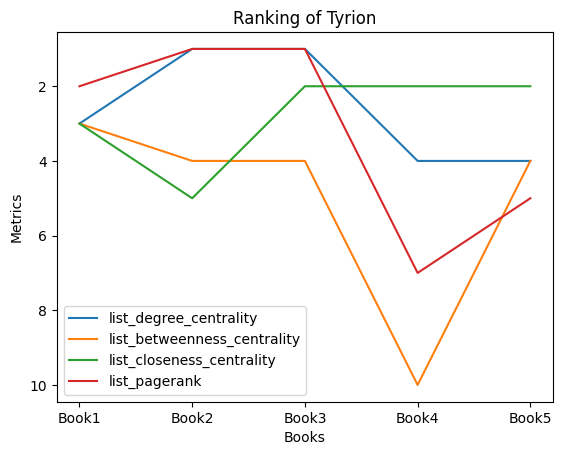

In [136]:
import matplotlib.pyplot as plt

books = ['Book1', 'Book2', 'Book3', 'Book4', 'Book5']

plt.plot(books, list_degree_centrality, label='list_degree_centrality')
plt.plot(books, list_betweenness_centrality, label='list_betweenness_centrality')
plt.plot(books, list_closeness_centrality, label='list_closeness_centrality')
plt.plot(books, list_pagerank, label='list_pagerank')

plt.gca().invert_yaxis()  # Inverts the y-axis to show higher ranks at the top.
plt.xlabel('Books')  # Sets the x-axis label.
plt.ylabel('Metrics')  # Sets the y-axis label.
plt.title('Ranking of Tyrion')  # Sets the title of the plot.
plt.legend()  # Adds a legend to the plot.

plt.show()  # Displays the plot.


In the second book, "A Clash of Kings," Tyrion Lannister assumes the position of Hand of the King, which grants him greater authority and influence in King's Landing. As a result, his degree centrality in the network rises, reflecting his increased engagement with a larger number of characters. Additionally, his pagerank centrality experiences a corresponding increase due to his role as a mediator among various individuals and factions within the network.

However, in the third book, "A Storm of Swords," Tyrion's circumstances undergo a significant transformation. He becomes falsely accused of a crime, specifically the murder of King Joffrey Baratheon at the Purple Wedding. Consequently, many characters turn against him, causing a decline in his degree centrality. His interactions with others diminish as he becomes a fugitive, resulting in a reduced degree centrality.

Similarly, his betweenness centrality also diminishes during this period. This centrality metric measures the extent to which a character lies on the shortest paths between other characters in the network. As Tyrion loses his role as a mediator and finds himself isolated, he no longer serves as a connecting link or intermediary among different characters and factions. Hence, his betweenness centrality experiences a decline.

Overall, the graph and its centrality changes portray the evolving dynamics of Tyrion Lannister's position and relationships throughout the second and third books of the series.




### 4.Try multiple community detection algorithms, which one reflect the real communities (houses) in the serie and why ?

In [146]:
from networkx.algorithms import community
# Detect communities using the Louvain algorithm
partition = community.greedy_modularity_communities(graph)

# Print the communities
for i, comm in enumerate(partition):
    print(f"Community {i+1}: {comm}")


Community 1: frozenset({'Bran-Stark', 'Theon-Greyjoy', 'Selyse-Florent', 'Arya-Stark', 'Shireen-Baratheon', 'Davos-Seaworth', 'Narbert-Grandison', 'Benethon-Scales', 'Owen', 'Roger-Ryswell', 'Eddard-Stark', 'Frenya', 'Donal-Noye', 'Tycho-Nestoris', 'Bartimus', 'Sour-Alyn', 'Godric-Borrell', 'Godry-Farring', 'Rowan', 'Wex-Pyke', 'Sigorn', 'Catelyn-Stark', 'Ben-Bones', 'Benjen-Stark', 'Denys-Mallister', 'Jon-Snow', 'Damon-Dance-for-Me', 'Alliser-Thorne', 'Waif', 'Patchface', 'Dalla', 'Rickon-Stark', 'Marya-Seaworth', 'Fulk', 'Soren-Shieldbreaker', 'Axell-Florent', 'Skinner', 'Rattleshirt', 'Theomore', 'Harwood-Stout', 'Grunt', 'Kindly-Man', 'Val', 'Qhorin-Halfhand', 'Yellow-Dick', 'Aenys-Frey', 'Devan-Seaworth', 'Stannis-Baratheon', 'Hobb', 'Ulmer', 'Robett-Glover', 'Marlon-Manderly', 'Clydas', 'Barbrey-Dustin', 'Willow-Witch-eye', 'Salladhor-Saan', 'Maege-Mormont', 'Mance-Rayder', 'Joramun', 'Lyanna-Mormont', 'Jeor-Mormont', 'Azor-Ahai', 'Wun-Weg-Wun-Dar-Wun', 'Ramsay-Snow', 'Ygritte', 

The majority of communities identified by the Louvain algorithm are questionable in their validity. This is because they include characters who are deceased, such as Melisandre, Roose Bolton, and Ygritte. Furthermore, certain characters, like Wyman Manderly and Denys Mallister, are not known to have any direct connections or associations with each other. The presence of legendary figures like Azor Ahai within a community suggests that it is more of a hypothetical grouping rather than a realistic one based on the events depicted in the books.

In [122]:
# Run the Label Propagation algorithm to detect communities
communities = nx.algorithms.community.label_propagation.label_propagation_communities(graph)

# Print the detected communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: {'Marselen', 'Daenerys-Targaryen', 'Jhiqui', 'Drogo', 'Skahaz-mo-Kandaq', 'Caggo', 'Lucifer-Long', 'Qezza', 'Marghaz-zo-Loraq', 'Reznak-mo-Reznak', 'Archibald-Yronwood', 'Rakharo', 'Cleon', 'Hizdahr-zo-Loraq', 'Aegon-I-Targaryen', 'Ezzara', 'Tattered-Prince', 'Hero', 'Jhogo', 'Miklaz', 'Steelskin', 'Xaro-Xhoan-Daxos', 'Cletus-Yronwood', 'Gerris-Drinkwater', 'Meris', 'Larraq', 'Lysono-Maar', 'Quaithe', 'Khrazz', 'Kedry', 'Bloodbeard', 'Groleo', 'Daario-Naharis', 'Barristan-Selmy', 'Barsena', 'Ben-Plumm', 'Grazhar', 'Yurkhaz-zo-Yunzak', 'Grey-Worm', 'Symon-Stripeback', 'Ghael', 'Draqaz', 'Quentyn-Martell', 'Eroeh', 'Viserys-Targaryen', 'Aggo', 'Missandei', 'Old-Bill-Bone', 'Widower', 'Irri', 'Belwas', 'Daeron-II-Targaryen', 'Mezzara', 'Denzo-Dhan', 'Galazza-Galare'}
Community 2: {'Illyrio-Mopatis', 'Shrouded-Lord', 'Yandry', 'Myles-Toyne', 'Moqorro', 'Tyrion-Lannister', 'Ysilla', 'Haldon', 'Pono', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Varys', 'Harry-Strickland', 'Rodri


The Label Prop algorithm reveals distinct communities based on character associations within the Targaryen storyline and the city of Meereen. Community 1 represents characters involved in the Targaryen storyline and their connection to Meereen. Community 2 reflects characters associated with Aegon Targaryen's storyline and their respective supporters. In Community 3, both characters are deceased but have a familial connection to the Targaryen family. One of them was in love with Ned Stark, whose sister had a secret relationship with the Targaryen prince, who was married to Ellia Martell of Dorne.




In [149]:
# Apply the Girvan-Newman algorithm
communities_generator = nx.community.girvan_newman(graph)

# Get the top-level communities
top_level_communities = next(communities_generator)

# Print the community assignment for each node
for idx, community in enumerate(top_level_communities):
    print(f"Community {idx}: {community}")


Community 0: {'Drogo', 'Harys-Swyft', 'Nyessos-Vhassar', 'Victarion-Greyjoy', 'Tyene-Sand', 'Jorah-Mormont', 'Reznak-mo-Reznak', 'Aerys-II-Targaryen', 'Balon-Swann', 'Cletus-Yronwood', 'Meris', 'Haldon', 'Larraq', 'Scolera', 'Pono', 'Varys', 'Kedry', 'Dunsen', 'Brienne-of-Tarth', 'Ellaria-Sand', 'Belaquo', 'Brynden-Tully', 'Barsena', 'Ben-Plumm', 'Grey-Worm', 'Wulfe', 'Boros-Blount', 'Lyanna-Stark', 'Nurse', 'Robert-Strong', 'Viserys-Targaryen', 'Mace-Tyrell', 'Franklyn-Flowers', 'Longwater-Pyke', 'Gregor-Clegane', 'Old-Bill-Bone', 'Widower', 'Rafford', 'Jon-Connington', 'Qyburn', 'Illyrio-Mopatis', 'Shrouded-Lord', 'Trystane-Martell', 'Lucifer-Long', 'Ronnet-Connington', 'Myles-Toyne', 'Wylis-Manderly', 'Rakharo', 'Hoster-Blackwood', 'Aegon-I-Targaryen', 'Ezzara', 'Shae', 'Kevan-Lannister', 'Pycelle', 'Xaro-Xhoan-Daxos', 'Scar', 'Lysono-Maar', 'Khrazz', 'Hugh-Hungerford', 'Malaquo-Maegyr', 'Yurkhaz-zo-Yunzak', 'Osney-Kettleblack', 'Spotted-Cat', 'Draqaz', 'Eroeh', 'Belwas', 'Myrcella-

We see that the characters mentioned are not closely related to each other. They come from various regions such as the North (including Jon Snow and Bran Stark), the Iron Islands (including Balon Greyjoy and Asha Greyjoy), the Riverlands (including Walder Frey and Brynden Rivers), the Night's Watch (including Samwell Tarly and Jeor Mormont), and even Essos (including Melisandre and Salladhor Saan). These characters possess distinct goals, loyalties, and motivations, and some of them are even adversaries or hold conflicting interests. This indicates that their connections to each other are minimal, and they do not share significant relationships or associations.

#  Machine Learning on Graphs

Next we will have a look at machine learning on graph networks. There are many types of learning targets depending on the level of the task, which are usually divided into:

* Graph-level prediction (e.g. molecule classification)
* Edge-level prediction (e.g. friend suggestions in social graphs)
* Node-level prediction (e.g. topic classification in citation networks)

![graph_tasks.jpg](https://drive.google.com/uc?id=1lIdvy_NXVLr7KhkM3afNgVDcokZ-BDy2)

Graphs contain an inherent structure and furthermore usually exhibit further attributes that constitute nodes and edges. The machine learning process on graphs is similar to learning on structured tabular data but comes with an important challenge:

* Feature engineering:  To work with machine learning algorithms, the graph structure and attributes must be converted into features that are helpful for solving the task at hand. Such features can be symbolic (for instance node degrees, clustering coefficients, path lengths) or sub-symbolic (node, edge, or graph embeddings). In the following, we will focus on the engineering of sub-symbolic features.

![graphml_process.jpg](https://drive.google.com/uc?id=1kAQQUE6sE75V1Y8i4uACzKfH6EjYBl8x)

The rest of the learning pipeline is essentially analogous to the one we know from Data Mining: We learn a model (which can be anything from a simple Decision Tree to Neural Networks) using the created features, improve it via parameter tuning using a clean evaluation setup and finally end up with a good model we can use for prediction.

### Graph Maching Learning with Pytorch-geometric

![pytorch-geo.jpg](https://drive.google.com/uc?id=1nu47e40yuVmgDwjZsIbwlfMkQ_4uRSpY)

[Pytorch-geometric](https://pytorch-geometric.readthedocs.io/en/latest/index.html) is a python library built on top of the vastly popular [Pytorch](https://pytorch.org/) library for building Deep Neural Networks of all kinds. The package offers constructs and methods specifically designed for handling graphs and related data, including:

* Data Handling of Graphs
* Data Transforms
* Mini-batching on Graphs
* Various pre-implemented Graph models and their layers

To use Pytorch-geometric, we first need to install Pytorch and subsequently the Pytorch-geometric package.

In [ ]:
# The following command installs Pytorch (CPU-only) via pip.
# If you are using Anaconda, we would recommend you install via conda using the command line

# to install via pip
# !pip3 install -U torch torchvision torchaudio
# !pip install -U torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

# OR

# use the following in an Anaconda Prompt (not in the notebook!) to install Pytorch via conda
# conda install pytorch torchvision torchaudio cpuonly -c pytorch

## Practical use-case of GraphML: Predicting Topics in citation networks

In this exercise we will have a look at node classification using various machine learning algorithms. For this we will make use of the popular CORA graph dataset, which consists of scientific publications represented as nodes and citations inbetween these publications as the edges of the graph.

Pytorch-geometric offers a dataset subpackage which we can use to easily load many popular graphs, for more information see [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html).

In [ ]:
from torch_geometric.datasets import Planetoid

# load the dataset using Pytorch-geometric
dataset = Planetoid(root='tmp/cora/', name="Cora")

In [ ]:
# Let's print some features of this dataset

print(f'Amount of graphs: {len(dataset)}')
print(f'Amount of classes/labels: {dataset.num_classes}')
print(f'Amount of node features: {dataset.num_node_features}')

In [ ]:
data = dataset[0]
data

In [ ]:
data.is_undirected()

We can see that the citation graph in the dataset contains 2708 nodes, each one having 1433 features. These 1433 features are a bag-of-words representation of each of the publications (see [here](https://ojs.aaai.org/aimagazine/index.php/aimagazine/article/view/2157)). There are 10.556/2 = 5.278 undirected edges between the nodes.

For each of the nodes a label (one of 7 topical domains) is available in the y attribute of the graph. Finally the dataset already contains predetermined training, validation and test splits to allow direct comparison with results from the original paper and other users. In the case of Graph Networks, these splits are provided as "masks" on the graph, meaning that when looking at the e.g. training portion of the graph, all labels for the validation and test portions are not considered. It is important to note, that even though labels are masked, the full graph is presented during training as well as testing.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# convert the graph to networkx for drawing
g = to_networkx(data, to_undirected=True)

fig = plt.figure(figsize=(20, 10))

# draw the graph
nx.draw_networkx(g, node_size=5, with_labels=False)

### Engineering node features with Node2Vec

For our first model, we will create some node-features using the node2vec method. This method takes inspiration from the popular Word2Vec model from the area of Natural Language Processing with the final embedding training being analogous. However, as the input to Word2Vec are sets of words from sentences selected by a sliding window, the authors of Node2Vec had to come up with a method of converting a graph into "sentences".

This is achieved by doing random walks over the graph starting from each node and then treating each of the walks as a "sentence" which can then be used as a training example for the skip-gram version of Word2Vec. In the implementation in Pytorch-geometric, the Node2Vec model further uses the negative sampling optimization process which was also used for training Word2Vec. This means that in every training step not all the weights of the network are changed but together with each "positive" example sentence a subset of negative "words" are sampled and during the backpropagation step only the weights of these selected input words are updated. In the case of Node2Vec that means not only "positive" random walks are sampled but each "positive" random walk is paired with a "negative" random walk for the purpose of negative sampling.

The Node2Vec model does not make use of any node features apart from the structural ones it creates using Random Walks. Of course it would possible to retrieve the learned embeddings and combine them with additional node features before applying a simple classifier.

![node2vec.jpg](https://drive.google.com/uc?id=1Lek4oxroisXHduYxp6RFzIPfTBzauvEF)

The following example applies the node2vec method to our graph to generate node embeddings which are subsequently used for training and evaluating a simple SVM classifier using scikit-learn.

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import Node2Vec

# set to use either GPU if available or CPU if not
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# first define the model and hyperparamters
model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=5,
                 context_size=5).to(device)

# prepare a dataloader and optimizer for training
loader = model.loader(batch_size=64, shuffle=True)
optimizer = torch.optim.Adam(list(model.parameters()), lr=0.01)

In [ ]:
# Let us have a look at what one example in our data loader looks like
idx, (pos_rw, neg_rw) = next(enumerate(loader))

# index of the batch
print(idx)
# positive random walks in batch idx
print(pos_rw)
# associated negative random walks in batch idx
print(neg_rw)

In the following cell we select one of the random walks created and visualize it together with the graph

In [ ]:
edge_tuples = [tuple(x) for x in data.edge_index.numpy().transpose()]
G = nx.from_edgelist(edge_tuples)
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')

nodelist = next(enumerate(loader))[1][0][0].tolist()
walk = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
nx.draw_networkx_nodes(G, 
                       ax=ax,
                       pos=nx.get_node_attributes(G, 'pos'), 
                       node_size=5,
                       alpha=0.3,
                       node_color='b')
nx.draw(walk, 
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'), 
        width=2,
        edge_color='r') 
ax = fig.add_subplot(1, 2, 2)
nx.draw(walk, 
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'), 
        width=2,
        edge_color='r') 

Now let's start training the actual Node2Vec model. First, we need to define a training loop that iterates through the random walks, calculates the loss and backpropagates it through the model to update the weights. Afterwards we can loop through our desired number of epochs and train the Node2Vec model.

In [ ]:
# function that defines our training loop
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [ ]:
from tqdm.notebook import tqdm

# here we actually train the model
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

The model is trained, we can now extract the learned embedding for our nodes, convert them from Pytorch Tensors to numpy arrays, and subsequently use the familiar scikit-learn functionality to train an SVM classifier

In [ ]:
import numpy as np

# get the embeddings from the model
embeddings = model()

# convert sets to numpy arrays
train_x = embeddings[data.train_mask].detach().numpy()
train_y = data.y[data.train_mask].detach().numpy()

valid_x = embeddings[data.val_mask].detach().numpy()
valid_y = data.y[data.val_mask].detach().numpy()

full_train_x = np.concatenate((train_x, valid_x), axis=0)
full_train_y = np.concatenate((train_y, valid_y), axis=0)

test_x = embeddings[data.test_mask].detach().numpy()
test_y = data.y[data.test_mask].detach().numpy()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVC classifier
clf = SVC()

# Define a parameter grid for hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Train the classifier using GridSearchCV on the training set
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(full_train_x, full_train_y)

# Evaluate the classifier on the test set
y_pred = grid_search.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy on test set:", accuracy)

## End-to-End Learning with Graph Neural Networks

Instead of using fixed (pre-engineered) node features, we can instead leverage the power of deep learning and make use of Graph Neural Networks to learn feature representation over multiple stacking layers of a GNN with a final classification layer. This allows for the combined learning of feature embeddings as well as their classification at the same time, commonly referred to as end-to-end learning. We can either initialize the node embeddings randomly or use some pretrained values for initialization. Since the dataset already contains features for each node, we can directly use them as input.

We need to define the train/test loops for our models. We can make it generic so as to be able to use it with any model we design later on.

In [ ]:
from sklearn.metrics import accuracy_score

# the training method called every epoch
# get model output, calculate loss, backpropagate
def train(data, model, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return float(loss)

# the evaluation method called every epoch
# get model output, compare with evaluation labels, save metrics if best validation loss since beginning training
@torch.no_grad()
def test(data, model):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = F.log_softmax(out, -1).argmax(dim=-1)
    
    accs = []
    losses = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        loss = F.cross_entropy(out[mask], data.y[mask])
        predictions = pred[mask].to('cpu')
        labels = data.y[mask].to('cpu')
        acc = accuracy_score(labels, predictions)
        losses.append(loss)
        accs.append(acc)

    return (losses, accs)

# the actual looping thorugh epochs and calling of the above two functions
def train_test_loop(data, model, optimizer):
    best_val_loss = 9999

    for epoch in range(1,101):
        loss = train(data, model, optimizer)
        (train_loss, val_loss, test_loss), (train_acc, val_acc, test_acc) = test(data, model)
        if epoch == 1:
            best_test_acc = 0
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_test_acc = test_acc

        log(Epoch=f'{epoch:02d}', Loss=f'{loss:.4f}', Train=f'{train_acc:.4f}', Val=f'{val_acc:.4f}', Test=f'{test_acc:.4f}')
    print(f'\nTest Accuracy in best validation Epoch: {best_test_acc}')

In the following example, we will use a Graph Convolutional Network (GCN) to learn node embeddings and subsequently classify them. We can directly use a preimplemented GCN model or we can build one layer-wise ourselves. In this example we will use the preimplemented [GCN](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.models.GCN.html#torch_geometric.nn.models.GCN) model. Let us first use randomly initialized embeddings for the nodes, which means we do not make use of the node features, i.e. the BOW representations.

In [ ]:
from copy import deepcopy

# make a copy of the graph and replace the node embeddings with randomly initialized ones
data_random = deepcopy(data)
data_random.x = torch.randn_like(data_random.x)

In [ ]:
from torch_geometric.logging import log
from torch_geometric.nn.models import GCN

# prepare the model and the optimizer
model = GCN(in_channels=dataset.num_node_features, hidden_channels=128,
            out_channels=dataset.num_classes, num_layers=6).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

# call our train/test loop and start training
train_test_loop(data_random, model, optimizer)

The GCN can significantly improve over the results of the Node2Vec+SVM combination. Now, let us use the actual available node features for initialization instead to see if this brings further improvement.

In [ ]:
# prepare the model and the optimizer
model = GCN(in_channels=dataset.num_node_features, hidden_channels=128, out_channels=dataset.num_classes, num_layers=6).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

# call our train/test loop and start training
train_test_loop(data, model, optimizer)

Clearly initializing the embeddings with node-related knowledge significantly improves the results the GCN can achieve, indicating that learning only the structure of the graph is not sufficient.

Pytorch-geometric offers many more GNN models you can try out-of-the-box. In the following we will train a Graph Attention Network ([GAT](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.models.GAT.html#torch_geometric.nn.models.GAT)) which leverages the self-attention mechanism that also powers the highly successful Transformer architecture in Natural Language Processing. Compared to the simple GCN, the GAT gives each node the ability to weight the incoming messages from other nodes differently and can put higher attention towards important messages.

In [ ]:
from torch_geometric.nn.models import GAT

model = GAT(in_channels=dataset.num_node_features, hidden_channels=128, out_channels=dataset.num_classes, num_layers=6).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

train_test_loop(data, model, optimizer)

You can find some student projects that were implemented using Pytorch-geometric [here](https://medium.com/stanford-cs224w) (these could give you some ideas if you want to use GNNs for your own projects, e.g. it is also possible to implement a recommendation system with GNNs and compare it to the "tradtional" approaches in Surprise).